Todo list: 
1) Create a template or slide to explain how to download from github, open jupyter and manage files
2) Show the twitter profile and how they work
_________
# Try/CATCH 2019

### Raquel Aoki and Sashini Herath

This Exercises is based on Professor Greg Baker class notes. 

## Pup Inflation: Analysing Tweets

This question is heavily inspired by David H. Montgomery's Pup Inflation post. His analysis is an excellent data science task, and we will ask the same question here: has there been grade inflation on the @dog_rates Twitter, which rates the cuteness of users' dog pictures?

We have the file dog_rates_tweets.csv with some of the twittes from this profile. To look for score inflation, we'll first have to make sense of the data. The necessary steps to do this:

1) Load the data from the CSV into a DataFrame. (Assume a dog_rates_tweets.csv file is in the same folder as the notebook file.)
2) Find tweets that contain an “/10” rating (because not all do). Extract the numeric rating. Exclude tweets that don't contain a rating.
3) Remove outliers: there are a few obvious ones. Exclude rating values that are too large to make sense. (Maybe larger than 25/10?)
4) Make sure the 'created_at' column is a datetime value, not a string. This is important for the plots.
5) Create a scatter plot of date vs rating, so you can see what the data looks like.

#### 1) Loading the file



In [12]:
#this is how we add comands on python 
import pandas as pd #here we are loading a library to help as manage the dataset 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import datetime
from scipy import stats
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style('grade3')


#filename = 'pagecounts-20160802-150000.txt'

#Reading the table in python 
#data = pd.read_table(filename, sep = ' ', header = None, index_col=1, 
         #            names = ['lang', 'page','views','bytes'])

In [4]:
#In order to check if the dataset was loaded, use the following command: 
data.head()
#You should a small dataset, with 5 rows and 4 columns 

,lang,views,bytes
page,,,
Nowogr%C3%B3d,en,1,12375
Lichfield,en,10,757739
Formula_Pacific,en,2,196062
Yellow_longnose_butterflyfish,en,1,13900
2005_Birmingham_riots,en,1,15352


In [5]:
rating_re = re.compile(r'(\d+(\.\d+)?)/10')
def get_rating(text):
    m = rating_re.search(text)
    if m:
        rate = float(m.group(1))
        #return rate
        if rate > 20:
            return None
        else:
            return rate
    else:
        return None

get_rating = np.vectorize(get_rating, otypes=[np.float])

def parse_date(d):
    return datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S')

parse_date = np.vectorize(parse_date, otypes=[np.object_])


In [6]:
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1])
data['rating'] = get_rating(data['text'])
data = data[data['rating'].notnull()]
data['timestamp'] = data['created_at'].apply(lambda d: d.timestamp())
fit = stats.linregress(data['timestamp'], data['rating'])

In [7]:
data['prediction'] = data['timestamp']*fit.slope + fit.intercept
fit.slope, fit.intercept

(4.565094136688219e-08, -55.95318015002792)

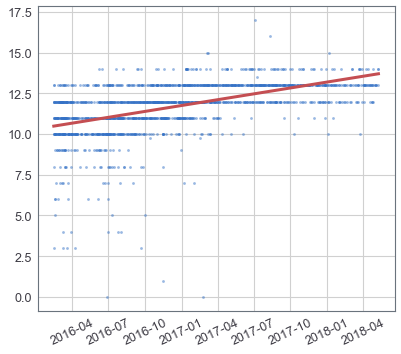

In [21]:

plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=3)
plt.show()